In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model 
%matplotlib inline
sns.set_style('darkgrid')

In [81]:
df = pd.read_csv('/content/Pakistan Available Job Dec 19 - Mar-21.csv')

In [82]:
df.head()

,Job_Name,label,Company_Name,Job_Type,Experience_Required,Department,JD,City,Date_Posted,output,age,easness,default,salary
0,"Full Time New Job Positions .Net, .Netcore, Fl...",Premium Job,"Nayel Solutions, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,"New Job Positions .net, .netcore, flutter, Tea...",Islamabad,12-Mar-21,no,56,yes,no,66834
1,Full Time Senior Web Developer Jobs in Pakistan,Premium Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,We are looking for an experienced Web Develope...,Karachi,12-Mar-21,no,42,yes,no,57389
2,Full Time Russian Speakers Jobs in Pakistan,Premium Job,"ICM JAPAN, Pakistan",Full Time Jobs,< 1 Year,Customer Service Jobs,International clients dealing exposure (B2B).S...,Karachi,12-Mar-21,no,37,yes,no,69409
3,Full Time Customer Support Specialist - Intern...,Premium Job,"ibex, Pakistan",Full Time Jobs,Job for Fresh Graduates,Customer Service Jobs,Responsible for acting as a liaison between ou...,Islamabad,9-Mar-21,no,31,yes,no,65828
4,Full Time English Speaker - International Busi...,Premium Job,"ICM JAPAN, Pakistan",Full Time Job,< 1 Year,Customer Service Job,International clients dealing exposure (B2B) a...,Karachi,5-Mar-21,no,30,yes,no,58287


In [83]:
df.tail()

,Job_Name,label,Company_Name,Job_Type,Experience_Required,Department,JD,City,Date_Posted,output,age,easness,default,salary
6675,Full Time Senior Software Engineer Job in Pak...,Hot Job,"KnovaSol, Pakistan",Full Time Job,3 Years Job Exp.,Computer Software Job,We required services of Senior Software Engine...,Islamabad,30-Dec-20,no,50,no,no,56856
6676,Full Time Commercial Experience Executive Job ...,Hot Job,"KnovaSol, Pakistan",Full Time Job,2 Years Job Exp.,Admin Job,As one of the leading employers in the country...,Multan,29-Dec-20,no,35,no,no,64717
6677,Full Time Business Development Executive Job i...,Hot Job,"Loop Brackets, Pakistan",Full Time Job,2 Years Job Exp.,Computer Software Job,The ideal candidate will have experience in al...,Lahore,29-Dec-20,no,28,no,no,62314
6678,Full Time 3D Modeler / CG Artist Game Jobs in ...,Hot Job,"Super Duper Studio , Pakistan",Full Time Jobs,2 Years Job Exp.,Computer Software Jobs,Must be able to create 3D Game Environments an...,Lahore,29-Dec-20,no,60,no,no,55716
6679,Full Time Bidding Expert / Social Media Market...,Hot Job,"Super Duper Studio , Pakistan",Full Time Jobs,Job for Fresh Graduates,Computer Software Jobs,Candidate Shall Be Expert in Getting Work from...,Lahore,29-Dec-20,no,51,no,no,55727


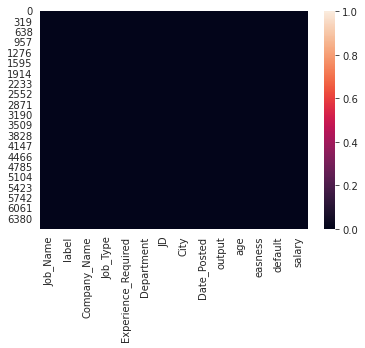

In [84]:
sns.heatmap(df.isnull())

In [85]:
df.fillna(method='bfill', inplace = True)

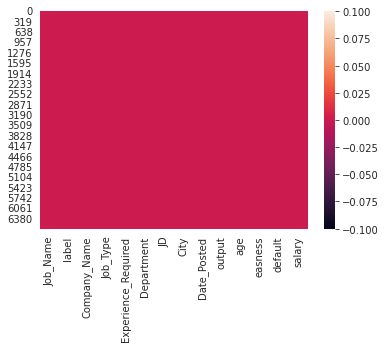

In [86]:
sns.heatmap(df.isnull())

In [87]:
df.describe()

,age,salary
count,6680.000000,6680.000000
mean,42.387425,59955.606437
std,10.419896,5765.217096
min,25.000000,50010.000000
25%,33.000000,54980.750000
50%,42.000000,59906.500000
75%,52.000000,64972.000000
max,60.000000,69999.000000


In [88]:
df.shape

(6680, 14)

In [89]:
df.columns

Index(['Job_Name', 'label', 'Company_Name', 'Job_Type', 'Experience_Required',
       'Department', 'JD', 'City', 'Date_Posted', 'output', 'age', 'easness',
       'default', 'salary'],
      dtype='object')

Text(0, 0.5, 'frequency')

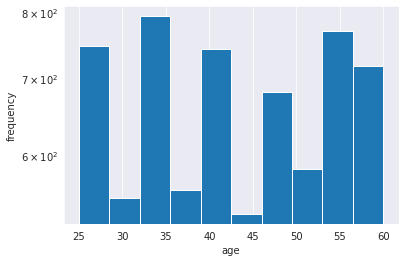

In [90]:
plt.hist(df['age'], log=True)
plt.xlabel('age')
plt.ylabel('frequency')

In [91]:
df.dtypes

Job_Name               object
label                  object
Company_Name           object
Job_Type               object
Experience_Required    object
Department             object
JD                     object
City                   object
Date_Posted            object
output                 object
age                     int64
easness                object
default                object
salary                  int64
dtype: object

In [92]:
df.fillna(method='bfill', inplace = True)

In [93]:
df.isnull().sum()

Job_Name               0
label                  0
Company_Name           0
Job_Type               0
Experience_Required    0
Department             0
JD                     0
City                   0
Date_Posted            0
output                 0
age                    0
easness                0
default                0
salary                 0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6680 entries, 0 to 6679
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Job_Name             6680 non-null   object
 1   label                6680 non-null   object
 2   Company_Name         6680 non-null   object
 3   Job_Type             6680 non-null   object
 4   Experience_Required  6680 non-null   object
 5   Department           6680 non-null   object
 6   JD                   6680 non-null   object
 7   City                 6680 non-null   object
 8   Date_Posted          6680 non-null   object
 9   output               6680 non-null   object
 10  age                  6680 non-null   int64 
 11  easness              6680 non-null   object
 12  default              6680 non-null   object
 13  salary               6680 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 730.8+ KB


In [95]:
df.isnull().sum().sum() 

0

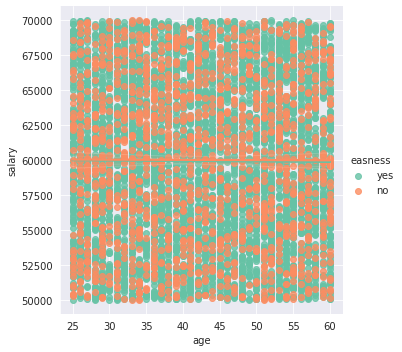

In [96]:
ax = sns.lmplot(x = 'age', y = 'salary', data=df, hue='easness', palette='Set2')

**Finding How many Jobs have Highest Salary and low salary from our output variable:**

[Text(0.5, 1.0, 'Countplot of Output Variable "Output"')]

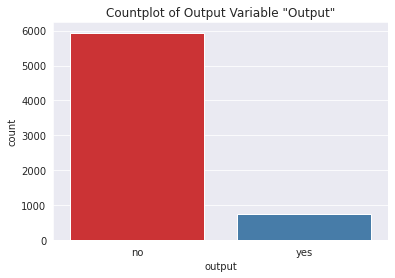

In [97]:
sns.countplot(x='output',data = df, palette = 'Set1').set(title = 'Countplot of Output Variable "Output"')

**Measuring Counterplot Of Output variable with easness**

[Text(0.5, 1.0, 'Countplot Of Output And Easness ')]

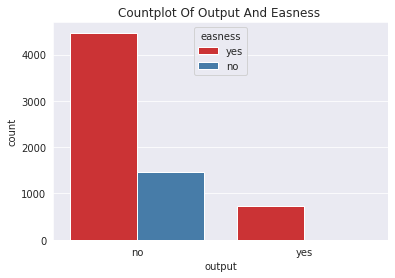

In [98]:
sns.countplot(x ='output', hue ='easness', data =df, palette='Set1').set(title = "Countplot Of Output And Easness ")

[Text(0.5, 1.0, 'Box Plot Of Age According to Output Varaible')]

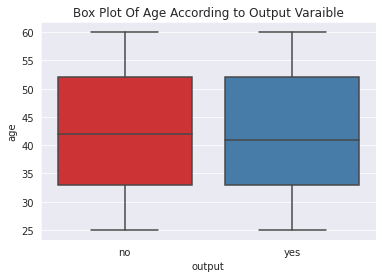

In [99]:
sns.boxplot(y= 'age', x = 'output', data = df, palette = 'Set1').set(title ="Box Plot Of Age According to Output Varaible")

[Text(0.5, 1.0, 'Countplot Of Output According to Default Status')]

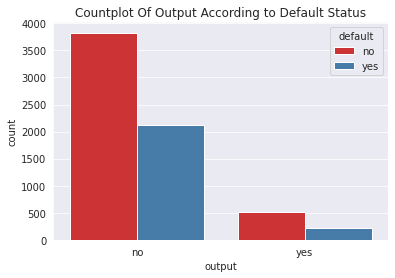

In [100]:
sns.countplot(x ='output', hue ='default', data = df, palette='Set1').set(title = 'Countplot Of Output According to Default Status')

**We can see from countplots of the output low and high Salary (y) and easniess status of jobs that whether or not a job has ease may have an impact on the likelihood of a yes. From the next plot, we can make an educated guess that age will not have a significant impact on Jobs.**

In [101]:
df.shape

(6680, 14)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6680 entries, 0 to 6679
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Job_Name             6680 non-null   object
 1   label                6680 non-null   object
 2   Company_Name         6680 non-null   object
 3   Job_Type             6680 non-null   object
 4   Experience_Required  6680 non-null   object
 5   Department           6680 non-null   object
 6   JD                   6680 non-null   object
 7   City                 6680 non-null   object
 8   Date_Posted          6680 non-null   object
 9   output               6680 non-null   object
 10  age                  6680 non-null   int64 
 11  easness              6680 non-null   object
 12  default              6680 non-null   object
 13  salary               6680 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 730.8+ KB


**Finding the Minimum Experience Required For a Job:**

In [104]:
df['Experience_Required'].min()

'1 Year Job Exp.'

Check Null **values**

In [105]:
df.isna().sum()

Job_Name               0
label                  0
Company_Name           0
Job_Type               0
Experience_Required    0
Department             0
JD                     0
City                   0
Date_Posted            0
output                 0
age                    0
easness                0
default                0
salary                 0
dtype: int64

In [106]:
df.dropna(axis=1)

,Job_Name,label,Company_Name,Job_Type,Experience_Required,Department,JD,City,Date_Posted,output,age,easness,default,salary
0,"Full Time New Job Positions .Net, .Netcore, Fl...",Premium Job,"Nayel Solutions, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,"New Job Positions .net, .netcore, flutter, Tea...",Islamabad,12-Mar-21,no,56,yes,no,66834
1,Full Time Senior Web Developer Jobs in Pakistan,Premium Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,We are looking for an experienced Web Develope...,Karachi,12-Mar-21,no,42,yes,no,57389
2,Full Time Russian Speakers Jobs in Pakistan,Premium Job,"ICM JAPAN, Pakistan",Full Time Jobs,< 1 Year,Customer Service Jobs,International clients dealing exposure (B2B).S...,Karachi,12-Mar-21,no,37,yes,no,69409
3,Full Time Customer Support Specialist - Intern...,Premium Job,"ibex, Pakistan",Full Time Jobs,Job for Fresh Graduates,Customer Service Jobs,Responsible for acting as a liaison between ou...,Islamabad,9-Mar-21,no,31,yes,no,65828
4,Full Time English Speaker - International Busi...,Premium Job,"ICM JAPAN, Pakistan",Full Time Job,< 1 Year,Customer Service Job,International clients dealing exposure (B2B) a...,Karachi,5-Mar-21,no,30,yes,no,58287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6675,Full Time Senior Software Engineer Job in Pak...,Hot Job,"KnovaSol, Pakistan",Full Time Job,3 Years Job Exp.,Computer Software Job,We required services of Senior Software Engine...,Islamabad,30-Dec-20,no,50,no,no,56856
6676,Full Time Commercial Experience Executive Job ...,Hot Job,"KnovaSol, Pakistan",Full Time Job,2 Years Job Exp.,Admin Job,As one of the leading employers in the country...,Multan,29-Dec-20,no,35,no,no,64717
6677,Full Time Business Development Executive Job i...,Hot Job,"Loop Brackets, Pakistan",Full Time Job,2 Years Job Exp.,Computer Software Job,The ideal candidate will have experience in al...,Lahore,29-Dec-20,no,28,no,no,62314
6678,Full Time 3D Modeler / CG Artist Game Jobs in ...,Hot Job,"Super Duper Studio , Pakistan",Full Time Jobs,2 Years Job Exp.,Computer Software Jobs,Must be able to create 3D Game Environments an...,Lahore,29-Dec-20,no,60,no,no,55716


**How Many jobs available in Pakistan**

In [108]:
df['Job_Name'].count()

6680

**Total Job Types Counting**

In [109]:
pak_df_JT = df['Job_Type'].value_counts()
pak_df_JT

Full Time Job     3821
Full Time Jobs    2859
Name: Job_Type, dtype: int64

**Most Demanding Jobs in Pakistan**

In [110]:
a = df['Job_Name'].unique().tolist()[0:10]
b = a[0].split(',')
b

['Full Time New Job Positions .Net',
 ' .Netcore',
 ' Flutter',
 ' Tea Boy Jobs in Pakistan']

**Top 5 Companies who provide jobs**

In [111]:
top_com = df['Company_Name'].unique()
top_com[0:5]

array(['Nayel Solutions, Pakistan',
       'Eurosoft Tech Private Limited, Pakistan', 'ICM JAPAN, Pakistan',
       'ibex, Pakistan', 'Uni Hosiery Co. Inc., Pakistan'], dtype=object)

**Data Scientist Jobs in Pakistan**

In [112]:
data_scientis_jobs = df[df['Job_Name'].str.contains('Data Scientist')]
data_scientis_jobs

,Job_Name,label,Company_Name,Job_Type,Experience_Required,Department,JD,City,Date_Posted,output,age,easness,default,salary
215,Full Time Trainee Data Scientist Job in Pakistan,Premium Job,"HG Markets Pvt Ltd, Pakistan",Full Time Job,2 Years Job Exp.,Finance Job,What is a Trainee Data Scientist?Jazz wants to...,Islamabad,28-Jan-21,no,41,yes,no,52469
240,Full Time Trainee Data Scientist Job in Pakistan,Premium Job,"HG Markets Pvt Ltd, Pakistan",Full Time Job,2 Years Job Exp.,IT Job,What is a Trainee Data Scientist?Jazz wants to...,Islamabad,23-Jan-21,no,33,yes,no,50439
486,Online Full Time Data Scientist Job in Pakistan,Premium Job,"Suvastutech Ltd., Pakistan",Full Time Job,2 Years Job Exp.,Computer Software Job,Engage with business teams to find opportuniti...,Swat,2-Mar-21,no,58,yes,no,59991
1859,Full Time Data Scientists Job in Pakistan,Premium Job,"2iQ Research GmbH, Pakistan",Full Time Job,3 Years Job Exp.,IT Job,Pre-Processing the raw data.Exploratory Data A...,Lahore,6-Nov-20,no,33,yes,no,62476
4496,Full Time Chief Data Scientist Job in Pakistan,Hot Job,"Mushawar UK Ltd, Pakistan",Full Time Job,8 Years Job Exp.,IT Job,We are looking for a Chief Data Scientist to l...,Lahore,27-Feb-20,no,56,yes,yes,56318
5615,Full Time Trainee Data Scientist Job in Pakistan,Gallery Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Job,2 Years Job Exp.,Finance Job,What is a Trainee Data Scientist?Jazz wants to...,Islamabad,28-Jan-21,yes,30,yes,yes,57795
5640,Full Time Trainee Data Scientist Job in Pakistan,Gallery Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Job,2 Years Job Exp.,IT Job,What is a Trainee Data Scientist?Jazz wants to...,Islamabad,23-Jan-21,yes,29,yes,yes,67025
5886,Online Full Time Data Scientist Job in Pakistan,Gallery Job,"Suvastutech Ltd., Pakistan",Full Time Job,2 Years Job Exp.,Computer Software Job,Engage with business teams to find opportuniti...,Swat,2-Mar-21,no,59,yes,yes,54852


**Data Scientist jobs available in Pkaistan**

In [113]:
data_scientis_jobs['Job_Name'].count()

8

**MATPOLIT AND SEABORN PLOTTING:**

**Minimum Experience for Applying a data scientist jobs**

Text(0.5, 0, 'Experience')

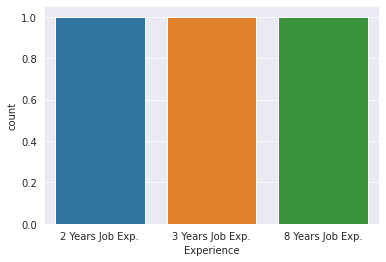

In [114]:
e = data_scientis_jobs['Experience_Required'].unique()
sns.countplot(x = e, data = df)
plt.xlabel('Experience')

Text(0.5, 0, 'City')

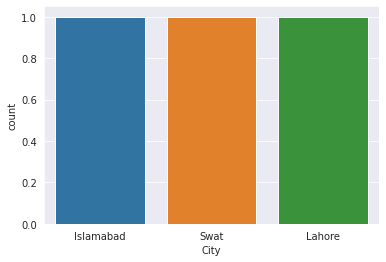

In [115]:
c = data_scientis_jobs['City'].unique()
sns.countplot(x = c, data = df)
plt.xlabel('City')

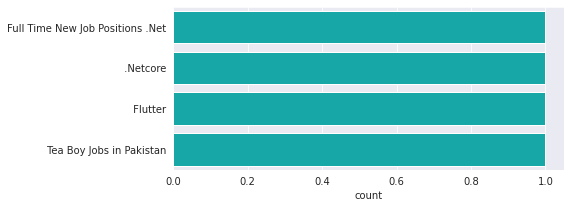

In [116]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y=b, data=df, color='c')

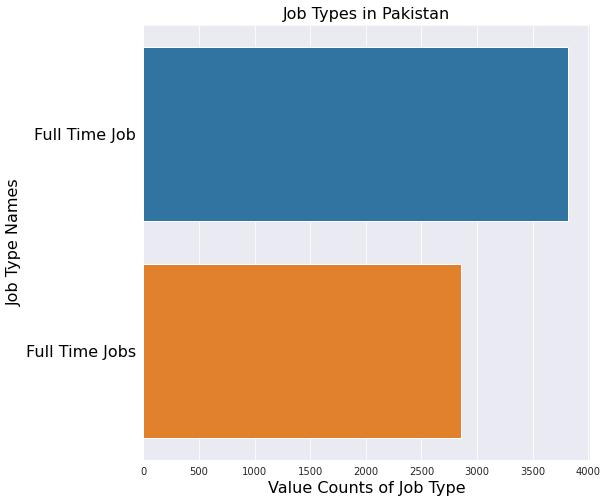

In [117]:
plt.figure(figsize=(8,8))
res=sns.barplot(x=pak_df_JT, y=pak_df_JT.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Job Type',fontsize = 16, color='black')
plt.ylabel('Job Type Names',fontsize = 16, color='black')
plt.title('Job Types in Pakistan',fontsize = 16, color='black')
plt.show()

# How many years of experienced required for job.

In [119]:
pak_df_ER = df['Experience_Required'].value_counts()
pak_df_ER

2 Years Job Exp.           1635
< 1 Year                   1591
1 Year Job Exp.            1418
3 Years Job Exp.            789
Job for Fresh Graduates     449
5 Years Job Exp.            323
4 Years Job Exp.            210
Job for Students            142
10 Years Job Exp.            36
8 Years Job Exp.             29
6 Years Job Exp.             28
7 Years Job Exp.             18
15 Years Job Exp.             6
9 Years Job Exp.              2
12 Years Job Exp.             2
14 Years Job Exp.             1
25 Years Job Exp.             1
Name: Experience_Required, dtype: int64

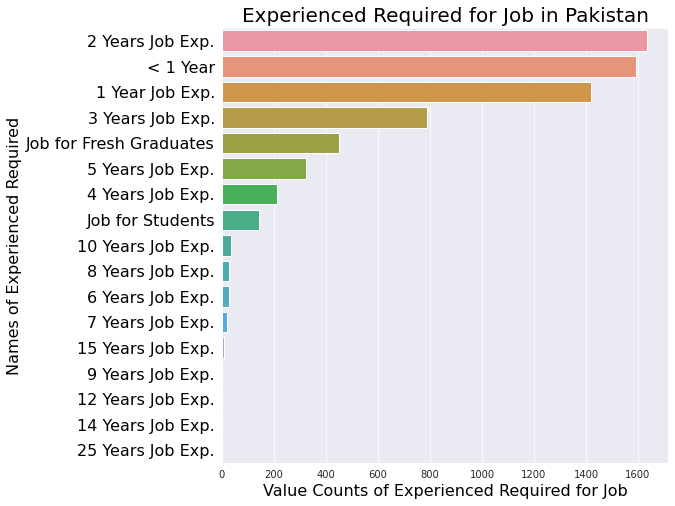

In [120]:
plt.figure(figsize=(8,8))
res=sns.barplot(x=pak_df_ER, y=pak_df_ER.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Experienced Required for Job', fontsize = 16, color='black')
plt.ylabel('Names of Experienced Required', fontsize = 16, color='black')
plt.title('Experienced Required for Job in Pakistan', fontsize = 20, color='black')
plt.show()

**How Many Jobs Are Available In Each Departments**

In [121]:
pak_df_Dept = df['Department'].value_counts().head(15)
pak_df_Dept

IT Job                    820
IT Jobs                   591
Computer Software Job     475
Computer Software Jobs    406
Customer Service Jobs     400
Web & E-commerce Job      315
Sales Jobs                265
Marketing Job             265
Web & E-commerce Jobs     262
Admin Job                 260
Sales Job                 236
Marketing Jobs            154
Engineering Job           150
Customer Service Job      113
Production Job             96
Name: Department, dtype: int64

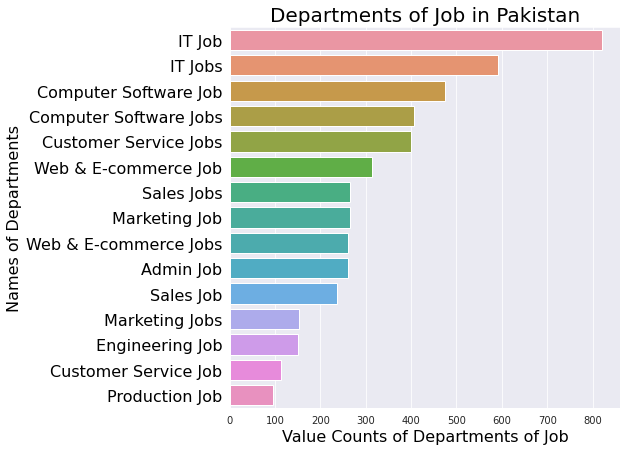

In [122]:
plt.figure(figsize=(7,7))
res=sns.barplot(x=pak_df_Dept, y=pak_df_Dept.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Departments of Job', fontsize = 16, color='black')
plt.ylabel('Names of Departments', fontsize = 16, color='black')
plt.title('Departments of Job in Pakistan', fontsize = 20, color='black')
plt.show()

# How many Jobs are available in each city.

In [123]:
pak_df_City = df['City'].value_counts().head(15)
pak_df_City

Lahore        2046
Islamabad     1921
Karachi       1700
Faisalabad     222
Sialkot        123
Rawalpindi     120
Hyderabad       74
Multan          68
Gujranwala      62
Peshawar        38
Abbottabad      33
Bahawalpur      21
Gujrat          17
Attock          14
Wah             10
Name: City, dtype: int64

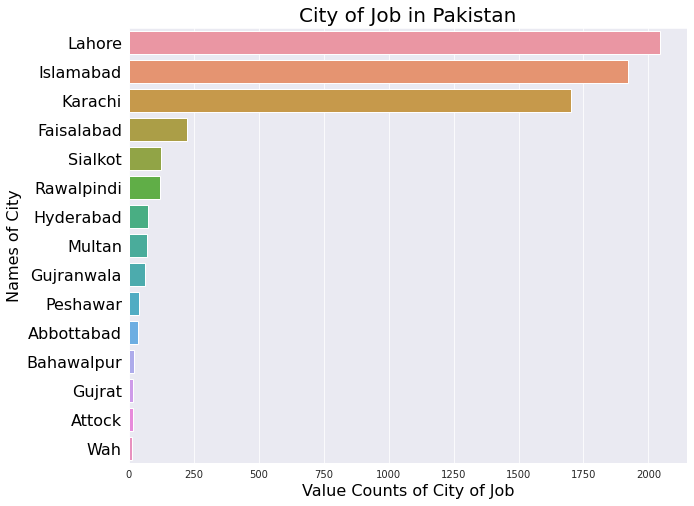

In [124]:
plt.figure(figsize=(10,8))
res=sns.barplot(x=pak_df_City, y=pak_df_City.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of City of Job', fontsize = 16, color='black')
plt.ylabel('Names of City', fontsize = 16, color='black')
plt.title('City of Job in Pakistan', fontsize = 20, color='black')
plt.show()

# How many Jobs are Posted in each dates.

In [125]:
pak_df_Date = df['Date_Posted'].value_counts().head(10)
pak_df_Date

23-Feb-21    134
22-Feb-21    116
28-Jan-21     86
12-Feb-21     74
15-Mar-21     70
27-Jan-21     68
23-Jan-21     68
21-Jan-21     68
6-Jan-21      66
26-Feb-21     62
Name: Date_Posted, dtype: int64

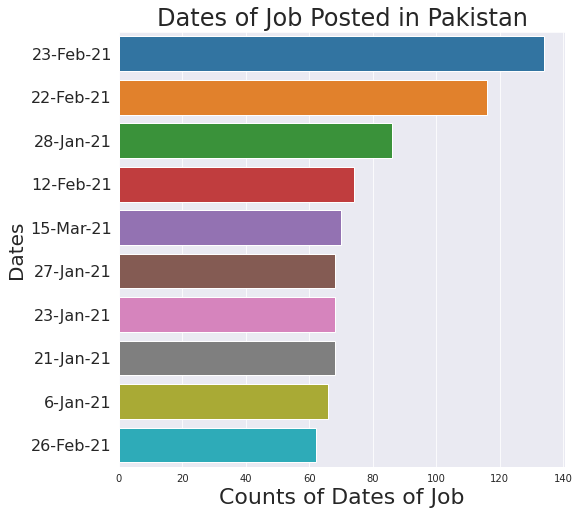

In [127]:
plt.figure(figsize=(8,8))
res=sns.barplot(x=pak_df_Date, y=pak_df_Date.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16)
plt.xlabel('Counts of Dates of Job', fontsize = 22)
plt.ylabel('Dates', fontsize = 20)
plt.title('Dates of Job Posted in Pakistan', fontsize = 24)
plt.show()

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6680 entries, 0 to 6679
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Job_Name             6680 non-null   object
 1   label                6680 non-null   object
 2   Company_Name         6680 non-null   object
 3   Job_Type             6680 non-null   object
 4   Experience_Required  6680 non-null   object
 5   Department           6680 non-null   object
 6   JD                   6680 non-null   object
 7   City                 6680 non-null   object
 8   Date_Posted          6680 non-null   object
 9   output               6680 non-null   object
 10  age                  6680 non-null   int64 
 11  easness              6680 non-null   object
 12  default              6680 non-null   object
 13  salary               6680 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 730.8+ KB


**FINDING CORELATIONS OF OUR SET:**

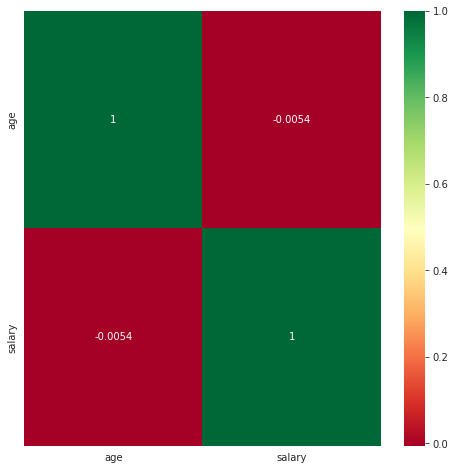

In [129]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [131]:
df[['Job_Name', 'label', 'Company_Name', 'Job_Type', 'Experience_Required', 'Department', 'JD', 'City', 'Date_Posted', 'output', 'easness', 'default']] = df[['Job_Name', 'label', 'Company_Name', 'Job_Type', 'Experience_Required', 'Department', 'JD', 'City', 'Date_Posted', 'output', 'easness', 'default']].astype('category')
df.dtypes

Job_Name               category
label                  category
Company_Name           category
Job_Type               category
Experience_Required    category
Department             category
JD                     category
City                   category
Date_Posted            category
output                 category
age                       int64
easness                category
default                category
salary                    int64
dtype: object

In [132]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.Job_Name.drop_duplicates())
df.Job_Name = label.transform(df.Job_Name)
label.fit(df.label.drop_duplicates())
df.label = label.transform(df.label)
label.fit(df.Company_Name.drop_duplicates())
df.Company_Name = label.transform(df.Company_Name)
label.fit(df.Job_Type.drop_duplicates())
df.Job_Type = label.transform(df.Job_Type)
label.fit(df.Experience_Required.drop_duplicates())
df.Experience_Required = label.transform(df.Experience_Required)
label.fit(df.Department.drop_duplicates())
df.Department = label.transform(df.Department)
label.fit(df.JD.drop_duplicates())
df.JD = label.transform(df.JD)
label.fit(df.City.drop_duplicates())
df.City = label.transform(df.City)
label.fit(df.Date_Posted.drop_duplicates())
df.Date_Posted = label.transform(df.Date_Posted)
label.fit(df.output.drop_duplicates())
df.output = label.transform(df.output)
label.fit(df.easness.drop_duplicates())
df.easness = label.transform(df.easness)
label.fit(df.default.drop_duplicates())
df.default = label.transform(df.default)
df.dtypes

Job_Name               int64
label                  int64
Company_Name           int64
Job_Type               int64
Experience_Required    int64
Department             int64
JD                     int64
City                   int64
Date_Posted            int64
output                 int64
age                    int64
easness                int64
default                int64
salary                 int64
dtype: object

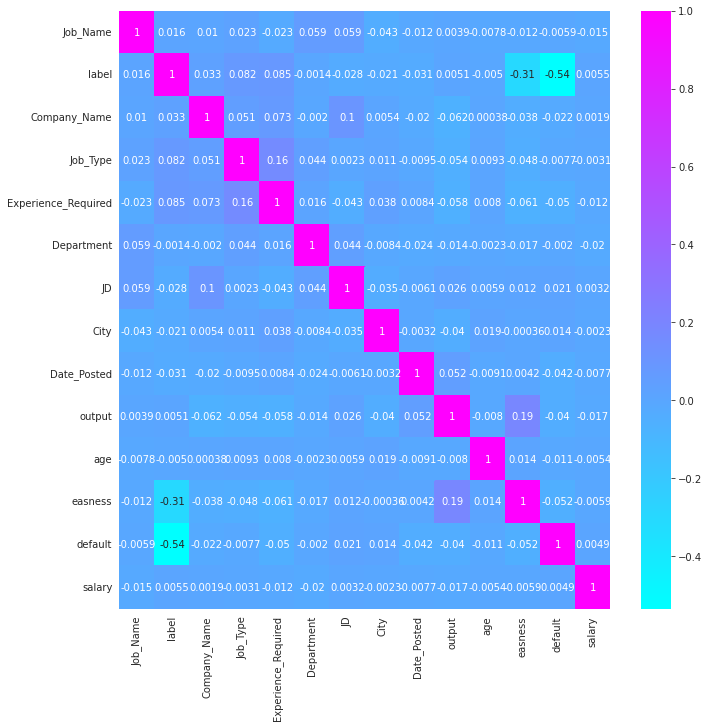

In [133]:
f, ax = plt.subplots(1, 1, figsize=(11, 11))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

**MACHINE LEARNING MODELS:**

***LINEAR REGRESSION MODEL:***

In [134]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['age'], axis = 1)
y = df['salary']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

7.275957614183426e-12
[-1.03545262e-15  5.09814413e-13  1.02695630e-15 -1.11046622e-13
  1.82592656e-14  1.18741822e-15 -4.99600361e-16  3.27884421e-15
 -7.97972799e-17  1.44139957e-13 -2.84174153e-13  5.76319079e-14
  1.00000000e+00]
1.0


**RANDOM FOREST ALGORITHM::**

In [136]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['age'], axis=1)
y = df.salary
Rfr = rfr(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)
# Printing the train data based on scores:
print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train)
      ,metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred),
       metrics.r2_score(y_test,x_test_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


MSE train data: 2.041, MSE test data: 11.382
R2 train data: 1.000, R2 test data: 1.000


**CONVERTING** CATEGORICAL **VARIABLES** TO DUMMY VARIABLES

In [ ]:
#dummying all Categorical variables I'll be using

# Job Name
Job_Name = pd.get_dummies(df['Job Name'],drop_first=True)

In [ ]:
#label
label = pd.get_dummies(df['label'],drop_first=True)

In [ ]:
#Company
Company_Name = pd.get_dummies(df['Company Name'],drop_first=True)

In [ ]:
#Job Type
Job_Type = pd.get_dummies(df['Job Type'],drop_first=True)

In [ ]:
#Experience
Experience_Required = pd.get_dummies(df['Experience Required'],drop_first=True)

In [ ]:
#Department
Department = pd.get_dummies(df['Department'],drop_first=True)

In [ ]:
#JD
JD = pd.get_dummies(df['JD'],drop_first=True)


In [ ]:
#City
City = pd.get_dummies(df['City'],drop_first=True)


In [ ]:
#Date Posted
Date_Posted = pd.get_dummies(df['Date Posted'],drop_first=True)


In [ ]:
#easness
easness = pd.get_dummies(df['easness'],drop_first=True)

In [ ]:
# drop Columns not needed
# drop: all columns being replaced with dummies
# default column bc of conclusions in data exploration
df.drop(['default', 'Job Name', 'label', 'Company Name','Job Type','Experience Required','Department','JD','City','Date Posted','easness'], axis = 1, inplace = True)

In [ ]:
#Now Concatenating new columns with dummy variables to df
df = pd.concat([df, Job_Name,label,Company_Name,Job_Type,Experience_Required,JD,City,Date_Posted,easness], axis = 1)

**NOW WE CAN SEE THE NEW COLUMNS:**

In [ ]:
print(df.columns)

Index(['output', 'age',
       'Full Time  Adviser Financial Services / Assistant Branch Manager Jobs in Pakistan',
       'Full Time  Assistant Manager Job in Pakistan',
       'Full Time  Associate Law / Legal Advisor / Lawyer  Job in Pakistan',
       'Full Time  Beauty Salon / Parlour Staff Jobs in Pakistan',
       'Full Time  Business Development Intern Job in Pakistan',
       'Full Time  Circle Technology Head - South Job in Pakistan',
       'Full Time  Customer Services Executive Jobs in Pakistan',
       'Full Time  DAE + RAE Refrigeration And Air Conditioning Technician Required Jobs in Pakistan',
       ...
       '9-Jan-21', '9-Jul-20', '9-Jun-20', '9-Mar-20', '9-Mar-21', '9-May-20',
       '9-Nov-20', '9-Oct-20', '9-Sep-20', 'yes'],
      dtype='object', length=12306)


In [ ]:
labels = pd.DataFrame(df['output'])
labels.output[labels.output == 'yes'] = 1
labels.output[labels.output == 'no'] = 0

df = df.drop(['output','yes'], axis = 1)
df = df.apply(pd.to_numeric)

**BUILDING A LOGISTIC REGRESSION MODEL:**

Data Preparation: Train, Test, Split
We will now split our data into training data sets and test data sets: **bold text**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.3, random_state=0 )

Building the Model
Now that we have our **training** and **test data** sets, we can train our model and make predictions: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model 

In [ ]:
# LOGISTIC REGRESSION
# Fitting The Model
logmodel = LogisticRegression(class_weight = 'balanced')
# class_weight setting balanced is powerful when there are more regrets than acceptance
logmodel.fit(X_train,y_train)
predictions_log = logmodel.predict(X_test)

**BUILDING CLASSIFICATION REPORT:**

In [ ]:
print(classification_report(y_test,predictions_log))

**MAKING CONFUSION MATRIX:**

In [ ]:
confusion_matrix(y_test,predictions_log)